In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\manib\OneDrive\Desktop\DS files\Project_3\kidney_disease - kidney_disease.csv")
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [7]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [9]:
df.shape

(400, 26)

In [11]:
df.drop('id',axis=1, inplace=True)


In [13]:
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [17]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [19]:
df.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [23]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [27]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [29]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [31]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [33]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [35]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'notckd']


In [37]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [39]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [41]:
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [43]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


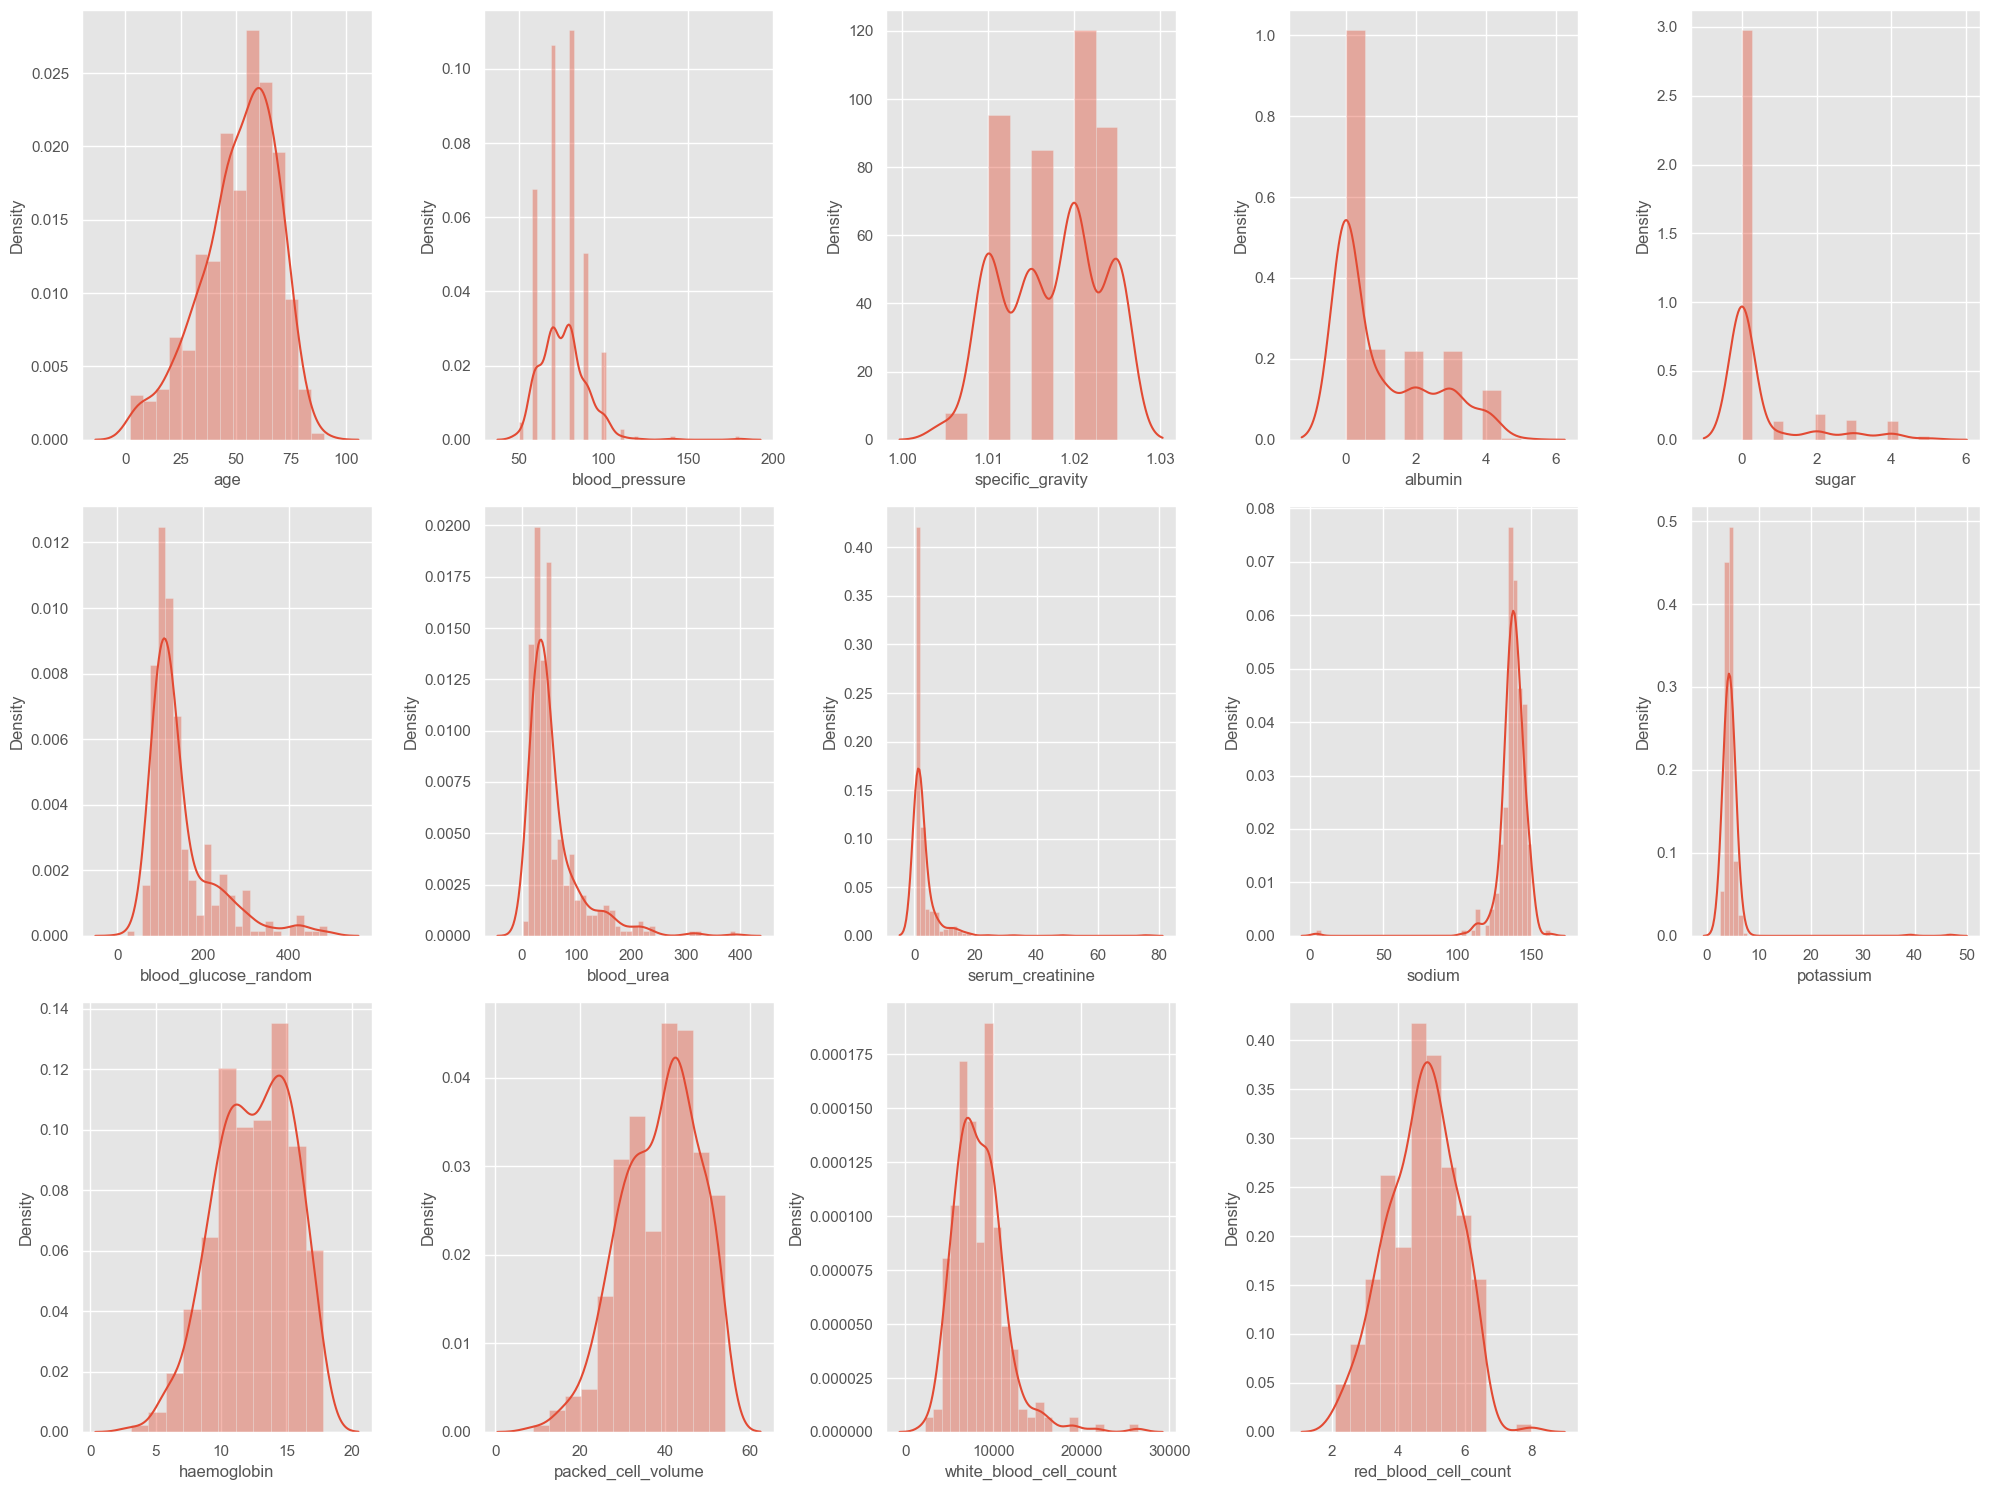

In [45]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

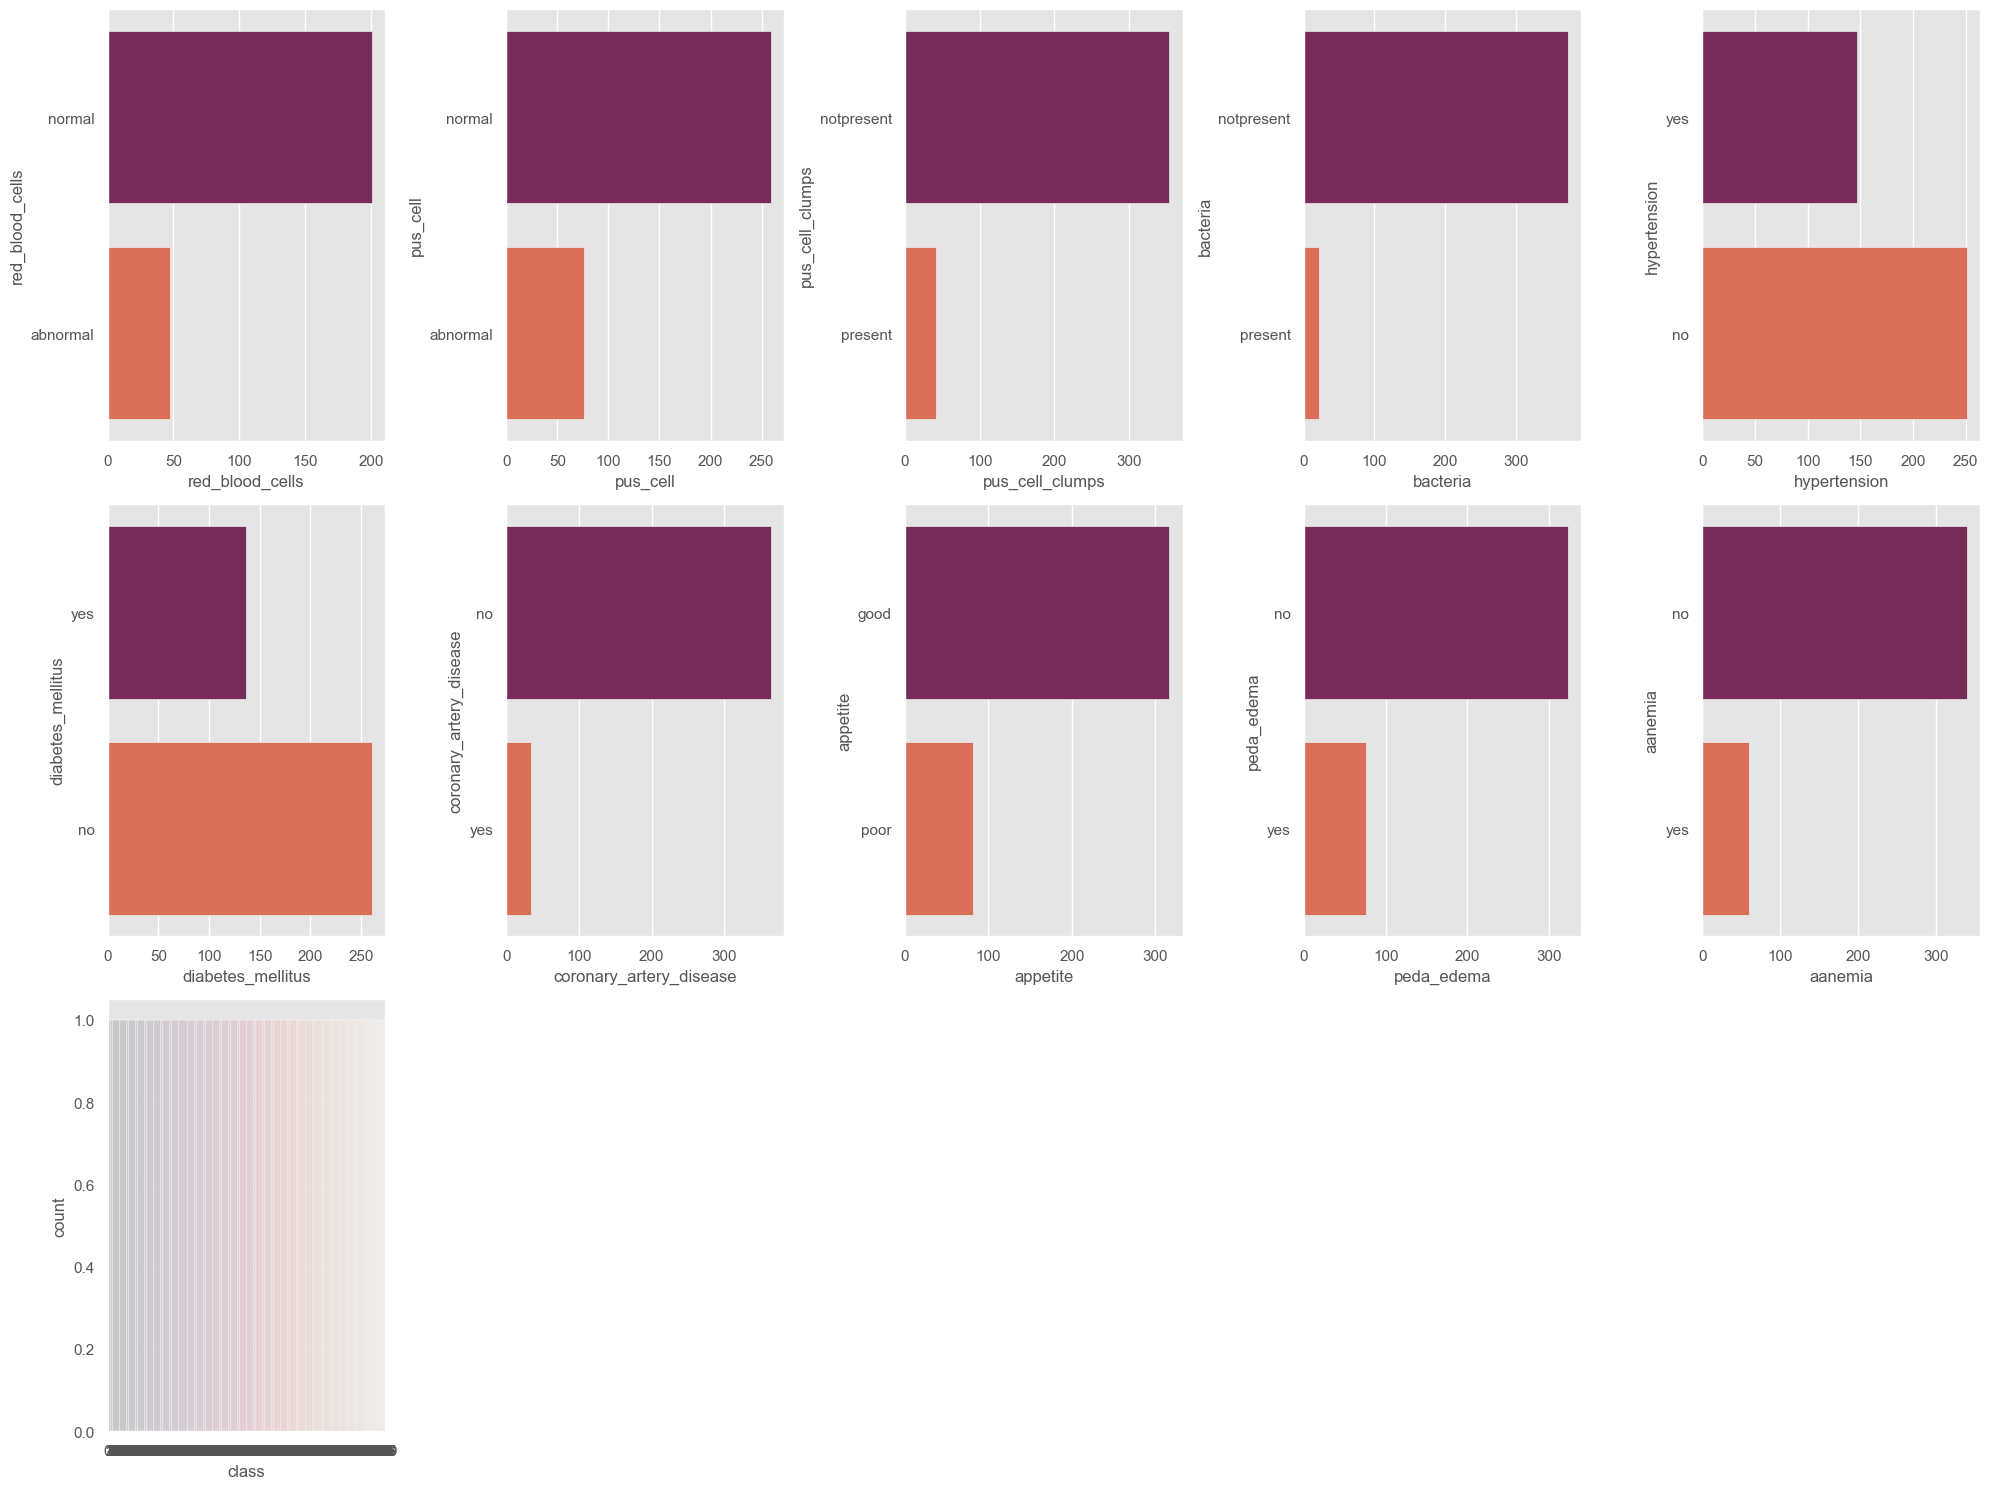

In [47]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column] ,palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [49]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [51]:
dictonary = {
        "red_blood_cells": {
        "abnormal":1,
        "normal": 0,
    },
        "pus_cell":{
        "abnormal":1,
        "normal": 0,
    },
        "pus_cell_clumps":{
        "present":1,
        "notpresent":0,
    },
        "bacteria":{
        "notpresent":0,
        "present": 1,
    },
        "hypertension":{
        "yes":1,
        "no": 0,
    },
        "diabetes_mellitus":{
        "yes":1,
        "no":0,
    },
        "coronary_artery_disease":{
        "yes":1,
        "no": 0,
    },
        "appetite":{
        "good":1,
        "poor": 0,
    },
        "peda_edema":{
        "yes":1,
        "no":0,
    },
        "aanemia":{
        "yes":1,
        "no":0,
    }
}

In [53]:

df=df.replace(dictonary)

In [55]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: >

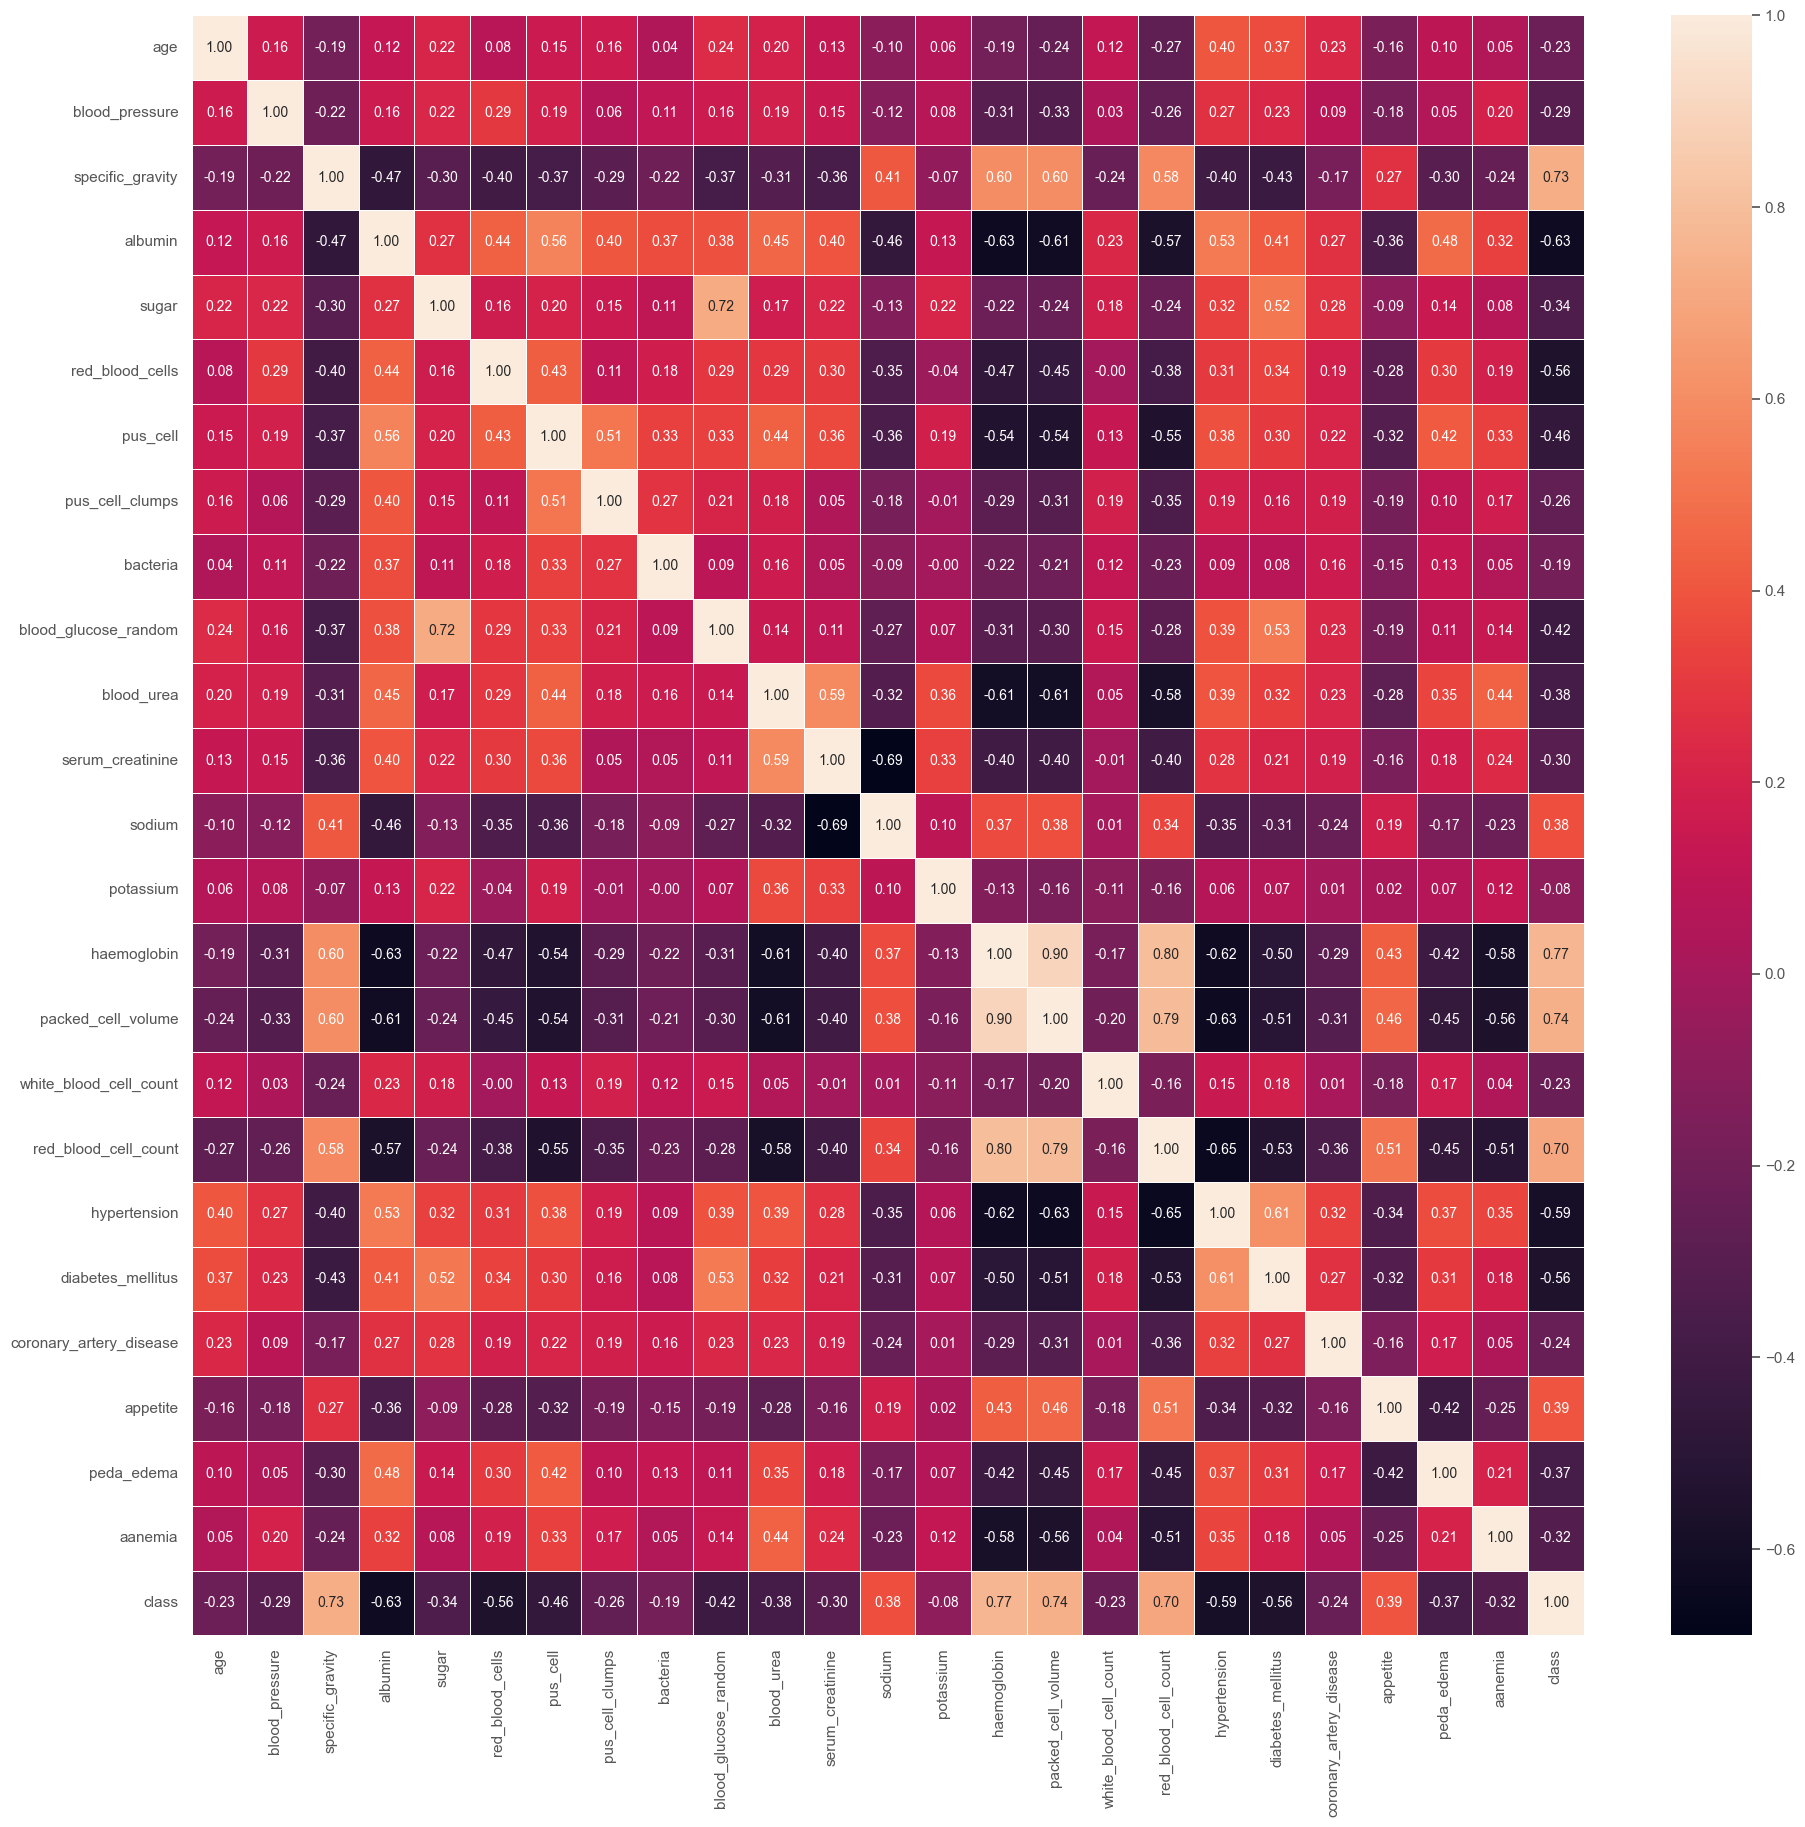

In [57]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [59]:
df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.079987,0.150867,0.157693,0.042160,0.244992,...,-0.242119,0.118339,-0.268896,0.400254,0.369420,0.233560,-0.161168,0.097621,0.053346,-0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.294129,0.189310,0.057891,0.111204,0.160193,...,-0.326319,0.029753,-0.261936,0.271301,0.228946,0.085602,-0.177914,0.054045,0.197345,-0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.395774,-0.374407,-0.291618,-0.220656,-0.374710,...,0.603560,-0.236215,0.579476,-0.400085,-0.431046,-0.174722,0.268498,-0.298618,-0.242699,0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.437873,0.558535,0.401284,0.368373,0.379464,...,-0.611891,0.231989,-0.566437,0.525756,0.413609,0.268324,-0.357455,0.477274,0.321187,-0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.164609,0.202815,0.151222,0.107047,0.717827,...,-0.239189,0.184893,-0.237448,0.321933,0.523372,0.279979,-0.087417,0.143085,0.075233,-0.344070
red_blood_cells,0.079987,0.294129,-0.395774,0.437873,0.164609,1.000000,0.426395,0.110282,0.180657,0.293097,...,-0.447670,-0.004201,-0.381538,0.306579,0.339051,0.193730,-0.282708,0.302234,0.189951,-0.555097
pus_cell,0.150867,0.189310,-0.374407,0.558535,0.202815,0.426395,1.000000,0.514578,0.329655,0.329612,...,-0.541718,0.134303,-0.548112,0.383096,0.301557,0.215118,-0.316625,0.415723,0.329643,-0.461812
pus_cell_clumps,0.157693,0.057891,-0.291618,0.401284,0.151222,0.110282,0.514578,1.000000,0.274491,0.208856,...,-0.312942,0.189944,-0.350248,0.192673,0.162261,0.186738,-0.187932,0.102485,0.174364,-0.263226
bacteria,0.042160,0.111204,-0.220656,0.368373,0.107047,0.180657,0.329655,0.274491,1.000000,0.093582,...,-0.208454,0.117600,-0.231433,0.086668,0.077761,0.161461,-0.147872,0.133500,0.051001,-0.185345
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,0.293097,0.329612,0.208856,0.093582,1.000000,...,-0.301385,0.150015,-0.281541,0.390203,0.526326,0.228829,-0.185179,0.108686,0.140121,-0.419672


In [61]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [63]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [65]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [67]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0


In [69]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [71]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [73]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [75]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [77]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [79]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [81]:
X = df.drop('class', axis = 1)
y = df['class']

In [83]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,303.0,...,11.3,38.0,6000.0,3.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,5.6,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.803125
Testing Accuracy of KNN is 0.6625
Confusion Matrix of KNN is 
 [[33 19]
 [ 8 20]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        52
           1       0.51      0.71      0.60        28

    accuracy                           0.66        80
   macro avg       0.66      0.67      0.65        80
weighted avg       0.70      0.66      0.67        80



In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [93]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 0.90625
Testing Accuracy of LR is 0.8875
Confusion Matrix of LR is 
 [[46  6]
 [ 3 25]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



In [95]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.9875
Confusion Matrix of DTC is 
 [[52  0]
 [ 1 27]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [99]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [101]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 0.996875
Testing Accuracy of Random Forest is 0.9625
Confusion Matrix of Random Forest is 
 [[52  0]
 [ 3 25]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", learning_rate = 0.001, max_depth = 10, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.61875
Testing Accuracy of XGB is 0.65
Confusion Matrix of XGB is 
 [[52  0]
 [28  0]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [107]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'DT', 'Random Forest Classifier', 'XgBoost'],
    'Score':[lr_acc, knn_acc, dtc_acc, rand_clf_acc, xgb_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
2,DT,0.9875
3,Random Forest Classifier,0.9625
0,Logistic Regression,0.8875
1,KNN,0.6625
4,XgBoost,0.6500


In [109]:
import pickle
filename = r'C:\Users\manib\OneDrive\Desktop\DS files\Project_3\kidney_model.sav'
pickle.dump(dtc, open(filename,'wb'))

NameError: name 'kidney_model' is not defined